<h1 align = "center">Machine Learning Project</h1>
<p align = "center">A study on the heating efficiency of buildings using machine learning models</p>

In [75]:
import sys
import os
import pandas   as pd
import numpy    as np
import math

_WORKING_DIRECTORY_PATH     = os.getcwd()
_DATASETS_DIRECTORY_PATH    = "datasets/datcw_na.csv"

<h2 align = 'center'>Import and Load Data</h2>

In [76]:
try:
    with open(file = _DATASETS_DIRECTORY_PATH, mode = 'r') as f:
        df = pd.read_csv(f)
        
        print(df)
        
except FileNotFoundError:
    print("Could not open file \'{}\'".format(f))

     X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
0    C3  1.19  622.55     NaN   89.31  7.00  1.98  0.00  0.00  15.55
1    C1  1.19  622.55  323.40  109.15  7.70  3.00  0.00  0.00  15.55
2    C1  0.88  463.05  291.06   99.23  5.67  4.40  0.00  0.00  15.55
3    C2  0.79  509.36  291.06  121.28  6.30  4.05  0.00  0.00  15.55
4    C1  0.89  507.15  385.39  121.28  7.70  2.00  0.00  0.00  20.84
..   ..   ...     ...     ...     ...   ...   ...   ...   ...    ...
763  C3  0.52  948.64  277.83  218.30  4.24  4.95  0.48  4.05  17.88
764  C2  0.50  727.65     NaN  266.80  3.47  1.98  0.44  5.00  16.54
765  C1  0.68  889.35  404.25  178.60  3.47  2.43  0.40  4.95  16.44
766  C3  0.50  654.88  363.82  218.30  3.15  3.96  0.36  4.50  16.48
767  C3  0.50  800.42  404.25  218.30  2.84  4.05  0.32  4.95  16.64

[768 rows x 10 columns]


<h2 align = 'center'>Managing Non-data</h2>

In [77]:
from sklearn.impute import SimpleImputer

nan_counter = 0

for i in range(0, len(df["X0"].values)):
    row = df.iloc[i]
    for value in row:
        if type(value) != str:
            if math.isnan(float(value)):
                nan_counter = nan_counter + 1

print("{} NaN values encountered".format(nan_counter))

if nan_counter > 0:
    # nan values exist, fix them.
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    rows = df.iloc[:, 1:9]
    imputer.fit(rows)
    rows = imputer.transform(rows)
    print(rows)
    df.iloc[:, 1:9] = rows
            

40 NaN values encountered
[[1.19000000e+00 6.22550000e+02 3.21102527e+02 ... 1.98000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.19000000e+00 6.22550000e+02 3.23400000e+02 ... 3.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.80000000e-01 4.63050000e+02 2.91060000e+02 ... 4.40000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.80000000e-01 8.89350000e+02 4.04250000e+02 ... 2.43000000e+00
  4.00000000e-01 4.95000000e+00]
 [5.00000000e-01 6.54880000e+02 3.63820000e+02 ... 3.96000000e+00
  3.60000000e-01 4.50000000e+00]
 [5.00000000e-01 8.00420000e+02 4.04250000e+02 ... 4.05000000e+00
  3.20000000e-01 4.95000000e+00]]


In [78]:
print(df)

     X0    X1      X2          X3      X4    X5    X6    X7    X8      Y
0    C3  1.19  622.55  321.102527   89.31  7.00  1.98  0.00  0.00  15.55
1    C1  1.19  622.55  323.400000  109.15  7.70  3.00  0.00  0.00  15.55
2    C1  0.88  463.05  291.060000   99.23  5.67  4.40  0.00  0.00  15.55
3    C2  0.79  509.36  291.060000  121.28  6.30  4.05  0.00  0.00  15.55
4    C1  0.89  507.15  385.390000  121.28  7.70  2.00  0.00  0.00  20.84
..   ..   ...     ...         ...     ...   ...   ...   ...   ...    ...
763  C3  0.52  948.64  277.830000  218.30  4.24  4.95  0.48  4.05  17.88
764  C2  0.50  727.65  321.102527  266.80  3.47  1.98  0.44  5.00  16.54
765  C1  0.68  889.35  404.250000  178.60  3.47  2.43  0.40  4.95  16.44
766  C3  0.50  654.88  363.820000  218.30  3.15  3.96  0.36  4.50  16.48
767  C3  0.50  800.42  404.250000  218.30  2.84  4.05  0.32  4.95  16.64

[768 rows x 10 columns]


<h2 align = 'center'>Encoding Categorical Values</h2>

In [79]:
# dictionary to store encoded values
encoded_dict = {
    "C1" : [None] * len(df["X0"].values), 
    "C2" : [None] * len(df["X0"].values), 
    "C3" : [None] * len(df["X0"].values)
    }

# iterate dataframe to add encoded values to dictionary
for i in range(0, len(df["X0"].values)):
    if df.iloc[i]["X0"].__contains__("C1"):
        encoded_dict["C1"][i] = 1
        encoded_dict["C2"][i] = 0
        encoded_dict["C3"][i] = 0
    elif df.iloc[i]["X0"].__contains__("C2"):
        encoded_dict["C1"][i] = 0
        encoded_dict["C2"][i] = 1
        encoded_dict["C3"][i] = 0
    elif df.iloc[i]["X0"].__contains__("C3"):
        encoded_dict["C1"][i] = 0
        encoded_dict["C2"][i] = 0
        encoded_dict["C3"][i] = 1

# create dataframe from dictionary
encoded_df = pd.DataFrame.from_dict(encoded_dict)

# concatenate encoded values to original dataframe
df = pd.concat(
    [df, encoded_df], 
    ignore_index = True, 
    axis = 1)

# ensure columns are named appropriately
df.rename(columns = {
    0   : "X0", 
    1   : "X1", 
    2   : "X2", 
    3   : "X3", 
    4   : "X4", 
    5   : "X5", 
    6   : "X6", 
    7   : "X7", 
    8   : "X8", 
    9   : "Y", 
    10  : "C1", 
    11  : "C2", 
    12  : "C3"
    }, inplace = True)

# drop original categorical field
df = df.drop("X0", axis = 1)

# rearrange output (y) to be at the last index
df = df.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,8]]

print(df)


       X1      X2          X3      X4    X5    X6    X7    X8  C1  C2  C3  \
0    1.19  622.55  321.102527   89.31  7.00  1.98  0.00  0.00   0   0   1   
1    1.19  622.55  323.400000  109.15  7.70  3.00  0.00  0.00   1   0   0   
2    0.88  463.05  291.060000   99.23  5.67  4.40  0.00  0.00   1   0   0   
3    0.79  509.36  291.060000  121.28  6.30  4.05  0.00  0.00   0   1   0   
4    0.89  507.15  385.390000  121.28  7.70  2.00  0.00  0.00   1   0   0   
..    ...     ...         ...     ...   ...   ...   ...   ...  ..  ..  ..   
763  0.52  948.64  277.830000  218.30  4.24  4.95  0.48  4.05   0   0   1   
764  0.50  727.65  321.102527  266.80  3.47  1.98  0.44  5.00   0   1   0   
765  0.68  889.35  404.250000  178.60  3.47  2.43  0.40  4.95   1   0   0   
766  0.50  654.88  363.820000  218.30  3.15  3.96  0.36  4.50   0   0   1   
767  0.50  800.42  404.250000  218.30  2.84  4.05  0.32  4.95   0   0   1   

         Y  
0    15.55  
1    15.55  
2    15.55  
3    15.55  
4    20.84

<h2 align = 'center'>Visualization of Data</h2>

array([[<AxesSubplot: xlabel='X1', ylabel='X1'>,
        <AxesSubplot: xlabel='X2', ylabel='X1'>,
        <AxesSubplot: xlabel='X3', ylabel='X1'>,
        <AxesSubplot: xlabel='X4', ylabel='X1'>,
        <AxesSubplot: xlabel='X5', ylabel='X1'>,
        <AxesSubplot: xlabel='X6', ylabel='X1'>,
        <AxesSubplot: xlabel='X7', ylabel='X1'>,
        <AxesSubplot: xlabel='X8', ylabel='X1'>,
        <AxesSubplot: xlabel='C1', ylabel='X1'>,
        <AxesSubplot: xlabel='C2', ylabel='X1'>,
        <AxesSubplot: xlabel='C3', ylabel='X1'>,
        <AxesSubplot: xlabel='Y', ylabel='X1'>],
       [<AxesSubplot: xlabel='X1', ylabel='X2'>,
        <AxesSubplot: xlabel='X2', ylabel='X2'>,
        <AxesSubplot: xlabel='X3', ylabel='X2'>,
        <AxesSubplot: xlabel='X4', ylabel='X2'>,
        <AxesSubplot: xlabel='X5', ylabel='X2'>,
        <AxesSubplot: xlabel='X6', ylabel='X2'>,
        <AxesSubplot: xlabel='X7', ylabel='X2'>,
        <AxesSubplot: xlabel='X8', ylabel='X2'>,
        <AxesSubplot

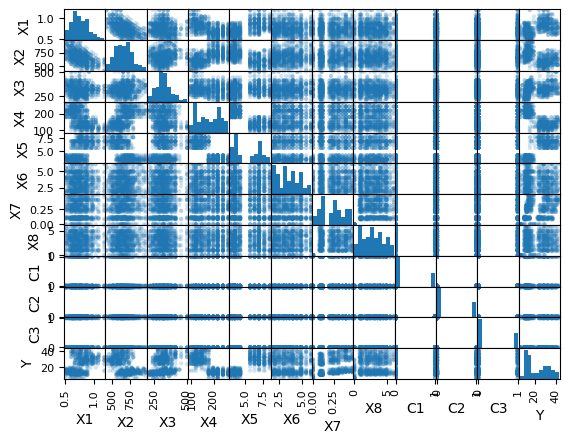

In [80]:
pd.plotting.scatter_matrix(df, alpha = 0.2)

<h2 align = 'center'>Train-Test Partitioning</h2>

In [91]:
print(df.iloc[:, 0:11])

       X1      X2          X3      X4    X5    X6    X7    X8  C1  C2  C3
0    1.19  622.55  321.102527   89.31  7.00  1.98  0.00  0.00   0   0   1
1    1.19  622.55  323.400000  109.15  7.70  3.00  0.00  0.00   1   0   0
2    0.88  463.05  291.060000   99.23  5.67  4.40  0.00  0.00   1   0   0
3    0.79  509.36  291.060000  121.28  6.30  4.05  0.00  0.00   0   1   0
4    0.89  507.15  385.390000  121.28  7.70  2.00  0.00  0.00   1   0   0
..    ...     ...         ...     ...   ...   ...   ...   ...  ..  ..  ..
763  0.52  948.64  277.830000  218.30  4.24  4.95  0.48  4.05   0   0   1
764  0.50  727.65  321.102527  266.80  3.47  1.98  0.44  5.00   0   1   0
765  0.68  889.35  404.250000  178.60  3.47  2.43  0.40  4.95   1   0   0
766  0.50  654.88  363.820000  218.30  3.15  3.96  0.36  4.50   0   0   1
767  0.50  800.42  404.250000  218.30  2.84  4.05  0.32  4.95   0   0   1

[768 rows x 11 columns]


In [92]:
print(df.iloc[:, [11]])

         Y
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
..     ...
763  17.88
764  16.54
765  16.44
766  16.48
767  16.64

[768 rows x 1 columns]


In [94]:
from sklearn.model_selection import train_test_split

_TRAIN_PARTITION_PERCENTAGE = 0.7
_TEST_PARTITION_PERCENTAGE  = 0.3

if _TRAIN_PARTITION_PERCENTAGE + _TEST_PARTITION_PERCENTAGE != 1.0:
    print("Train-test split does not encompass 100%", " of data")
else:
    X = df.iloc[:, 0:10]
    y = df.iloc[:, [11]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = _TEST_PARTITION_PERCENTAGE, random_state = 1)

<h2 align = 'center'>Feature Scaling</h2>

In [97]:
print(X_train.iloc[:, 0:])

       X1      X2          X3      X4    X5    X6    X7    X8  C1  C2
88   0.64  776.16  321.102527  242.55  3.85  1.80  0.10  1.10   0   1
467  0.62  727.65  323.400000  220.50  3.85  6.05  0.24  3.24   0   0
550  0.61  727.65  503.970000  121.28  5.67  4.84  0.44  1.21   0   0
147  1.08  622.55  323.400000  109.15  6.93  4.95  0.09  3.63   0   1
481  1.19  622.55  264.600000   89.31  7.70  2.43  0.22  4.05   0   1
..    ...     ...         ...     ...   ...   ...   ...   ...  ..  ..
645  0.84  654.89  412.340000  134.75  6.30  2.97  0.40  2.43   0   1
715  0.58  705.60  339.570000  220.50  3.15  4.95  0.40  3.96   1   0
72   0.89  555.66  242.550000  198.45  3.15  1.62  0.11  1.21   0   0
235  0.52  705.60  377.300000  218.30  3.47  5.50  0.11  4.84   1   0
37   0.80  683.55  257.980000  266.80  2.84  2.97  0.00  0.00   0   0

[537 rows x 10 columns]


In [98]:
print(X_test.iloc[:, 0:])

       X1      X2      X3      X4    X5    X6    X7    X8  C1  C2
285  0.61  889.35  297.68  242.55  3.85  3.63  0.10  5.50   0   0
101  0.73  507.15  315.32  121.28  6.93  2.70  0.09  1.98   1   0
581  0.90  456.44  315.32  148.23  6.93  2.97  0.40  2.42   0   1
352  0.96  630.63  308.70  145.53  7.70  1.98  0.25  2.42   0   0
726  0.99  557.86  315.32  110.25  6.30  3.96  0.44  4.95   0   1
..    ...     ...     ...     ...   ...   ...   ...   ...  ..  ..
241  0.88  509.36  355.74  121.28  7.70  2.70  0.10  5.00   0   1
599  0.92  654.89  374.85  122.50  5.67  5.50  0.40  1.80   0   0
650  0.89  686.00  198.45  218.30  4.24  3.60  0.36  3.63   0   0
11   0.69  529.20  238.14  119.07  8.47  4.95  0.00  0.00   1   0
214  0.75  654.89  458.15  121.28  8.47  3.96  0.09  3.24   0   1

[231 rows x 10 columns]


In [100]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train.iloc[:, 0:] = std_scaler.fit_transform(X_train.iloc [:, 0:])
X_test.iloc [:, 0:] = std_scaler.fit_transform(X_test.iloc  [:, 0:])

In [101]:
print(X_train.iloc[:, 0:])

           X1        X2        X3        X4        X5        X6        X7  \
88  -0.825781  0.870288  0.006672  1.234952 -0.705740 -1.373722 -0.990845   
467 -0.959048  0.480745  0.045431  0.815695 -0.705740  2.049858  0.009850   
550 -1.025681  0.480745  3.091672 -1.070868  0.285064  1.075144  1.439415   
147  2.106083 -0.363224  0.045431 -1.301507  0.971005  1.163755 -1.062324   
481  2.839049 -0.363224 -0.946533 -1.678743  1.390191 -0.866227 -0.133107   
..        ...       ...       ...       ...       ...       ...       ...   
645  0.506884 -0.103529  1.545861 -0.814750  0.628034 -0.431231  1.153502   
715 -1.225581  0.303680  0.318221  0.815695 -1.086819  1.163755  1.153502   
72   0.840051 -0.900361 -1.318520  0.396438 -1.086819 -1.518721 -0.919367   
235 -1.625381  0.303680  0.954731  0.773864 -0.912611  1.606806 -0.919367   
37   0.240351  0.126615 -1.058214  1.696040 -1.255582 -0.431231 -1.705628   

           X8        C1        C2  
88  -1.092561 -0.698237  1.390837  
467

In [102]:
print(X_test.iloc[:, 0:])

           X1        X2        X3        X4        X5        X6        X7  \
285 -1.092985  2.016361 -0.421053  1.428257 -0.853093  0.041162 -0.978660   
101 -0.233236 -1.409722 -0.115926 -1.104189  0.816623 -0.701934 -1.050588   
581  0.984741 -1.864292 -0.115926 -0.541400  0.816623 -0.486196  1.179187   
352  1.414616 -0.302834 -0.230435 -0.597783  1.234052 -1.277234  0.100264   
726  1.629553 -0.955152 -0.115926 -1.334526  0.475090  0.304841  1.466900   
..        ...       ...       ...       ...       ...       ...       ...   
241  0.841450 -1.389912  0.583235 -1.104189  1.234052 -0.701934 -0.978660   
599  1.128033 -0.085364  0.913789 -1.078712  0.133558  1.535344  1.179187   
650  0.913096  0.193509 -2.137475  0.921852 -0.641668  0.017191  0.891474   
11  -0.519819 -1.212064 -1.450941 -1.150340  1.651481  1.095879 -1.697942   
214 -0.089945 -0.085364  2.354664 -1.104189  1.651481  0.304841 -1.050588   

           X8        C1        C2  
285  1.812828 -0.639169 -0.741846  
101

<h2 align = 'center'>Linear and Polynomial Regression Models</h2>

In [126]:
# For simple linear regression and polynomial regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
# linear model
lm      = LinearRegression()
lm.fit(X_train, y_train)
y_pred  = lm.predict(X_test)
print(y_pred)


[[10.44730471]
 [27.28734355]
 [31.09963562]
 [30.69083117]
 [32.24659189]
 [16.03725338]
 [12.610391  ]
 [28.42871288]
 [18.34299817]
 [20.32434841]
 [21.26146683]
 [32.60124721]
 [30.15460107]
 [16.76487278]
 [11.50194147]
 [28.63999027]
 [18.27851657]
 [19.47450037]
 [14.90362101]
 [21.1066214 ]
 [27.37237135]
 [ 9.38709547]
 [28.22776432]
 [19.37813577]
 [11.07417064]
 [32.54177469]
 [18.3358555 ]
 [10.35507504]
 [26.61649604]
 [18.37172623]
 [31.23016648]
 [31.3930378 ]
 [ 7.93740579]
 [21.12143395]
 [23.80144999]
 [31.67153827]
 [12.37658115]
 [13.30294401]
 [28.61347148]
 [12.48289489]
 [32.69997392]
 [12.35961929]
 [12.03782852]
 [17.95235676]
 [12.12702685]
 [10.75407125]
 [23.09243631]
 [29.35335792]
 [34.23156109]
 [29.93469916]
 [11.5864991 ]
 [34.14521638]
 [11.36271143]
 [11.09127626]
 [28.20383395]
 [30.44445428]
 [27.60998199]
 [28.15946022]
 [11.39250181]
 [21.58557515]
 [14.19239697]
 [26.91214741]
 [22.29433549]
 [32.83602021]
 [21.86810258]
 [38.1416717 ]
 [24.56935

In [125]:
# specifically for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# interpret training and test data as coefficients for the polynomial model
pm                  = PolynomialFeatures(degree = 2)
X_train_polynomial  = pm.fit_transform(X_train)
X_test_polynomial   = pm.fit_transform(X_test)

# polynomial model
pm = LinearRegression()
pm.fit(X_train_polynomial, y_train)
y_pred = pm.predict(X_test_polynomial)
print(y_pred)

[[-1.01037043e+11]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [ 2.76797871e+11]
 [ 2.76797871e+11]
 [-1.01037043e+11]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [-1.01037043e+11]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [ 2.76797871e+11]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-8.71724705e+10]
 [ 2.76797871e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [ 2.76797871e+11]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-1.01037043e+11]
 [-1.01037043e+11]
 [-8.71724705e+10]
 [-1.01037043e+11]
 [-1.01037043e+11]
 [ 2.7679787

<h2 align = 'center'>Artificial Neural Network (ANN)</h2>

10

In [146]:
# For artifical neural networks
import tensorflow as tf

ann = tf.keras.models.Sequential()

hidden_layers = 2

for i in range(0, hidden_layers):
    ann.add(tf.keras.layers.Dense(units = len(X.columns), activation = "relu"))
    
print("{} hidden layers added".format(hidden_layers))

ann.add(tf.keras.layers.Dense(units = len(y.columns), activation = "sigmoid"))

ann.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

2 hidden layers added
Epoch 1/100
17/17 [==============================] - 0s 813us/step - loss: -0.2373 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 804us/step - loss: -4.5568 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 784us/step - loss: -9.1816 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 773us/step - loss: -14.4128 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 822us/step - loss: -20.4187 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 806us/step - loss: -28.0885 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 834us/step - loss: -37.1325 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 757us/step - loss: -49.1485 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 824us/step - loss: -63.9831 - accuracy: 0.0000e+00
Epoch 10/100
17/17